In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
mean_01 = np.array([1.0, 3.0])
mean_02 = np.array([-1.0, 0.0])

cov_01 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_02 = np.array([[0.9, 0.4], [0.4, 0.8]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 200)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 200)

print dist_01.shape, dist_02.shape
# print np.cov(dist_01.T), np.cov(dist_02.T)

(200, 2) (200, 2)


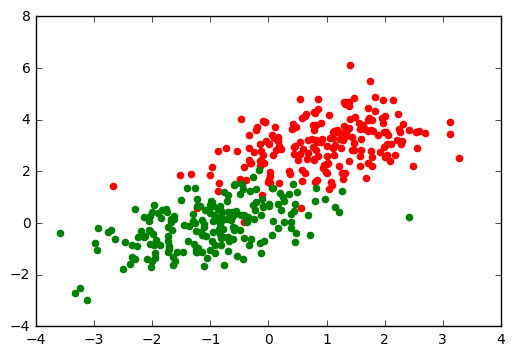

In [13]:
plt.figure(0)
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')

plt.show()

In [19]:
data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

data_std = (data - data.mean(axis=0))/data.std(axis=0)
print data_std.mean(axis=0), data_std.std(axis=0)

(400, 2) [-0.02255425  1.4789402 ]
[  2.02615702e-17   8.61949401e-16] [ 1.  1.]


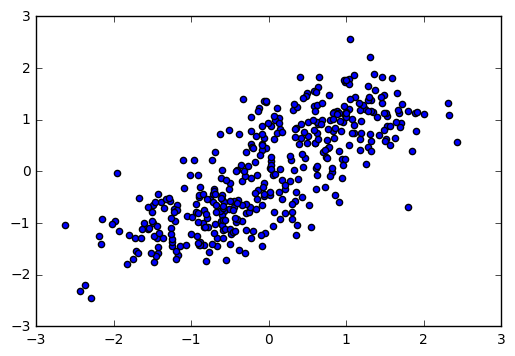

In [21]:
plt.figure(0)
plt.scatter(data_std[:, 0], data_std[:, 1])
plt.show()

In [23]:
def dist(p1, p2):
    # Eucledian distance
    return np.sqrt(((p1 - p2)**2).sum())

print dist(np.array([0, 0]), np.array([1, 1]))

1.41421356237


In [37]:
k = 3
dim = data_std.shape[1]

centers = np.random.random((k, dim))
print centers.shape

clusters = {}

for kx in range(k):
    clusters[kx] = {
        'center': centers[kx, :],
        'points': []
    }
print clusters

(3, 2)
{0: {'points': [], 'center': array([ 0.40603787,  0.64423482])}, 1: {'points': [], 'center': array([ 0.26126966,  0.49996552])}, 2: {'points': [], 'center': array([ 0.69819539,  0.48661678])}}


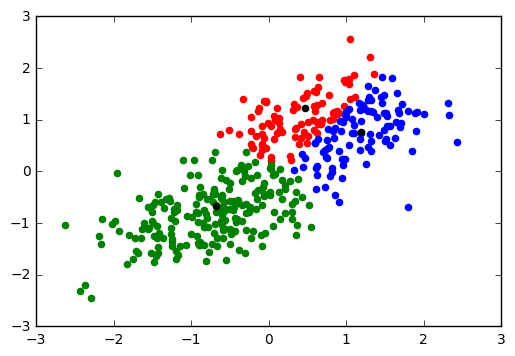

In [39]:
for px in range(data_std.shape[0]):
    distance_px = []
    for kx in range(k):
        distance_px.append(dist(data_std[px, :], clusters[kx]['center']))
    distance_px = np.asarray(distance_px)
    c_id = distance_px.argmin()
    
    clusters[c_id]['points'].append(data_std[px, :])

plt.figure(0)
cols = ['red', 'green', 'blue']

for kx in range(k):
    pts = np.asarray(clusters[kx]['points'])
    plt.scatter(pts[:, 0], pts[:, 1], color=cols[kx])
    plt.scatter(clusters[kx]['center'][0], clusters[kx]['center'][1], color='black')
    clusters[kx]['center'] = pts.mean(axis=0)
    clusters[kx]['points'] = []
plt.show()